<a href="https://colab.research.google.com/github/nargyanti/IPCV_Genap_2022/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


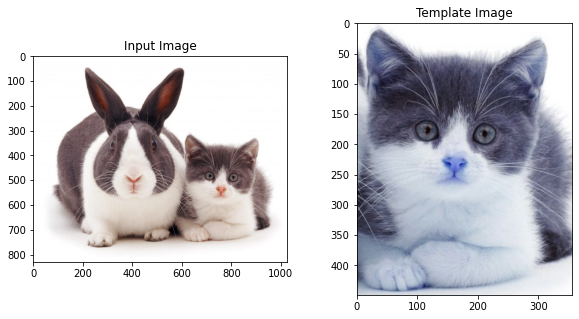

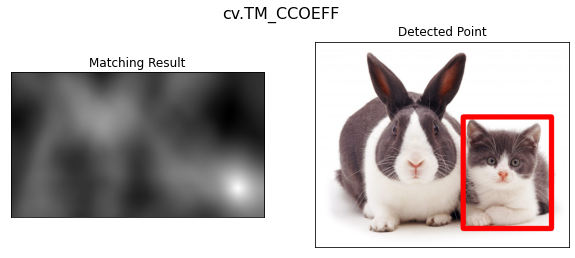

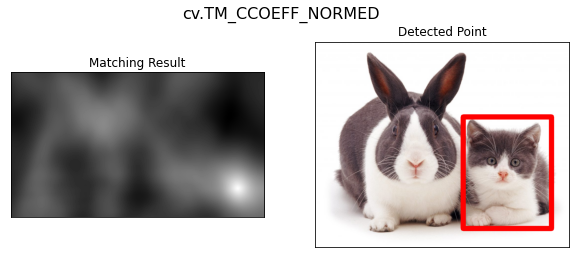

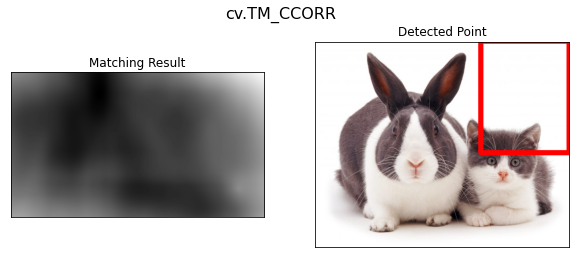

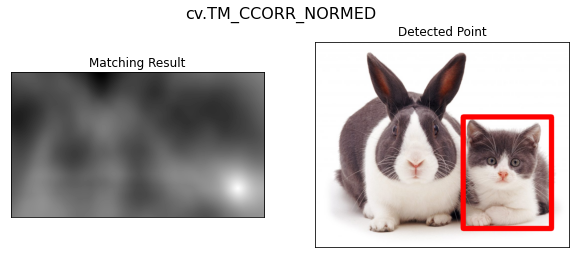

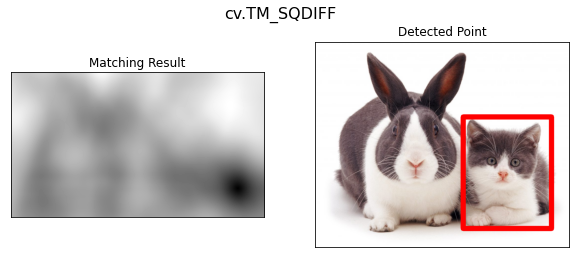

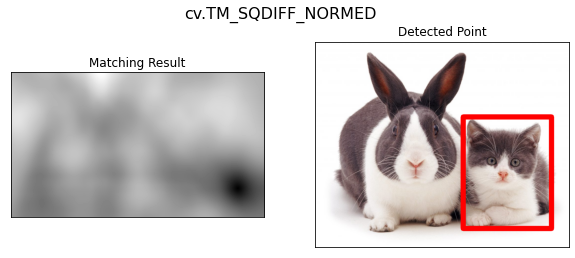

In [ ]:
# Import image
image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Object Detection/cats_and_bunnies.jpg'), cv.COLOR_BGR2RGB)
template = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/cat2_templatejpg.jpg')
h = template.shape[0]
w = template.shape[1]

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Show input image
plt.figure(figsize = (10,5))
plt.subplot(121),plt.imshow(image)
plt.title('Input Image')
plt.subplot(122),plt.imshow(template, cmap = 'gray')
plt.title('Template Image')
plt.show()

for meth in methods:
  img = image.copy()
  method = eval(meth)

  # Apply template matching
  res = cv.matchTemplate(img, template, method)
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

  # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
  if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
      top_left = min_loc
  else:
      top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)

  # Create rectangle to image
  cv.rectangle(img, top_left, bottom_right, color=(255,0,0), thickness=20)

  # Show result
  plt.figure(figsize = (10,10))
  plt.subplot(221),plt.imshow(res, cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(222),plt.imshow(img)
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.suptitle(meth, y=0.9, fontsize=16)
  plt.show()

# Source: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html

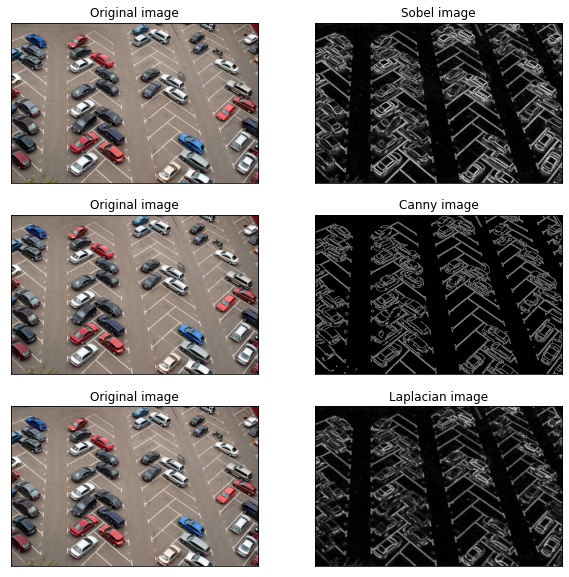

In [35]:
# Import image
original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Object Detection/parking-lot-cars.jpg'), cv.COLOR_BGR2RGB)
img = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Object Detection/parking-lot-cars.jpg'), cv.COLOR_BGR2RGB)
img = cv.GaussianBlur(img, (3, 3), 0)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Sobel
grad_x = cv.Sobel(gray, cv.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(gray, cv.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
sobel_image = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Canny
canny_image = cv.Canny(gray,100,200)

# Laplacian
laplacian_image = cv.Laplacian(gray,cv.CV_16S,ksize=3)
laplacian_image = cv.convertScaleAbs(laplacian_image)

# Show images
plt.figure(figsize = (10,10))
# Sobel
plt.subplot(3,2,1),plt.imshow(original)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.imshow(sobel_image,cmap = 'gray')
plt.title('Sobel image'), plt.xticks([]), plt.yticks([])

# Canny
plt.subplot(3,2,3),plt.imshow(original,cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(canny_image,cmap = 'gray')
plt.title('Canny image'), plt.xticks([]), plt.yticks([])

# Laplacian
plt.subplot(3,2,5),plt.imshow(original, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,6),plt.imshow(laplacian_image, cmap = 'gray')
plt.title('Laplacian image'), plt.xticks([]), plt.yticks([])

plt.show()

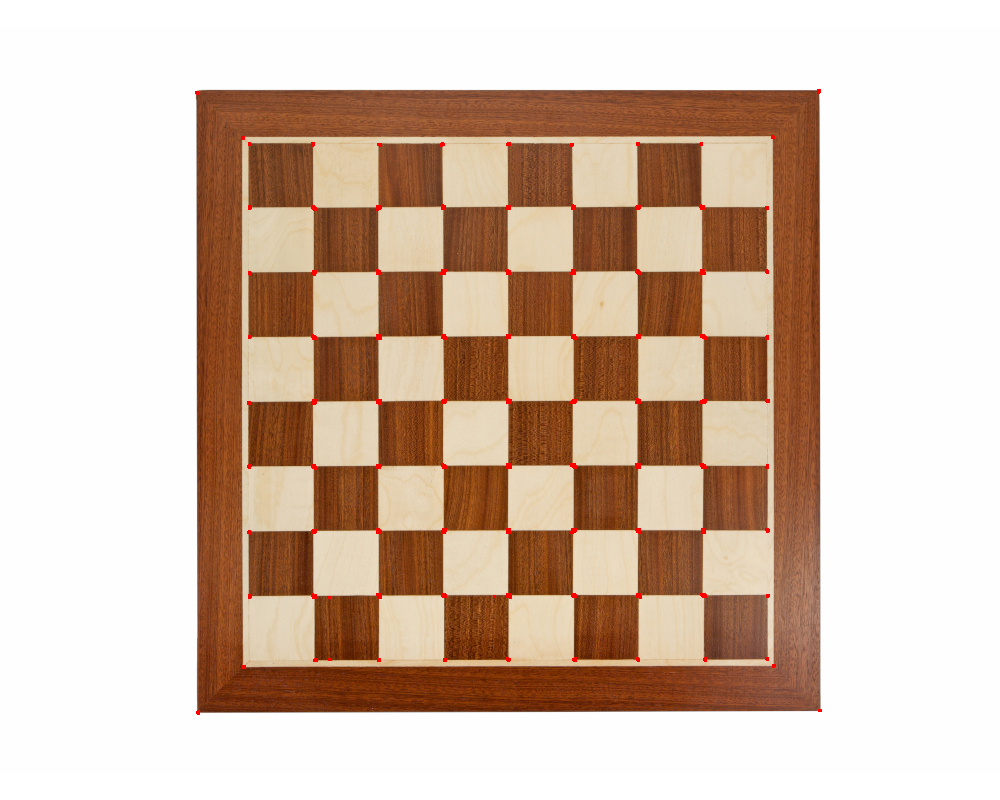

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(np.float32)

# Detect corner and dilate it
result = cv.cornerHarris(img_gray, 2, 3, 0.04)
result = cv.dilate(result,None)

# Threshold for an optimal value, it may vary depending on the image.
img[result > 0.01*result.max()]=[0,0,255]

# Show image
cv2_imshow(img)

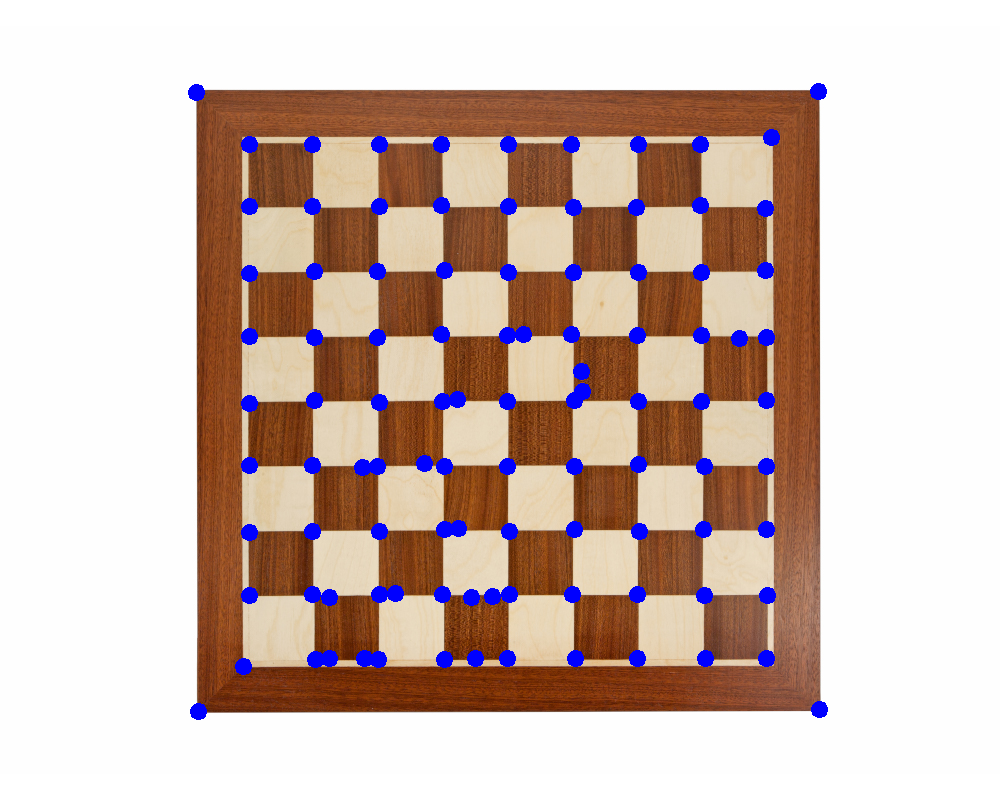

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg')
img2 = np.copy(img)

corners = cv.goodFeaturesToTrack(img_gray, 100, 0.01, 10)
corners = corners.astype(np.int0)

for i in corners:
    x,y = i.ravel()
    cv.circle(img2,(x,y),3,255, 10)

cv2_imshow(img2)

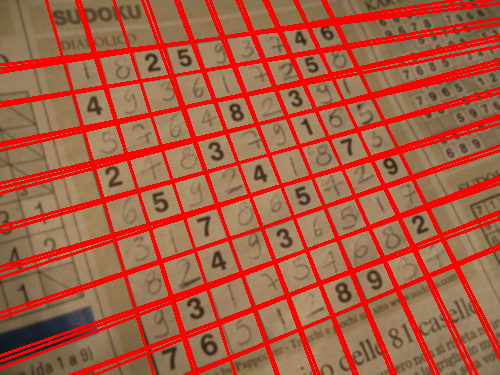

In [76]:
# Import image
img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/sudoku.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Convert to canny > dilate > erode
edges = cv.Canny(gray,90,150,apertureSize=3)
kernel = np.ones((3,3),np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)
kernel = np.ones((3,5),np.uint8)
edges = cv.erode(edges,kernel,iterations = 1)

# Do hough lines
lines = cv.HoughLines(edges,1,np.pi/180,200)

# Merge lines
for line in lines:
  for rho,theta in line:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 3000*(-b))
    y1 = int(y0 + 3000*(a))
    x2 = int(x0 - 3000*(-b))
    y2 = int(y0 - 3000*(a))

    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

# cv2_imshow(edges)
cv2_imshow(img)

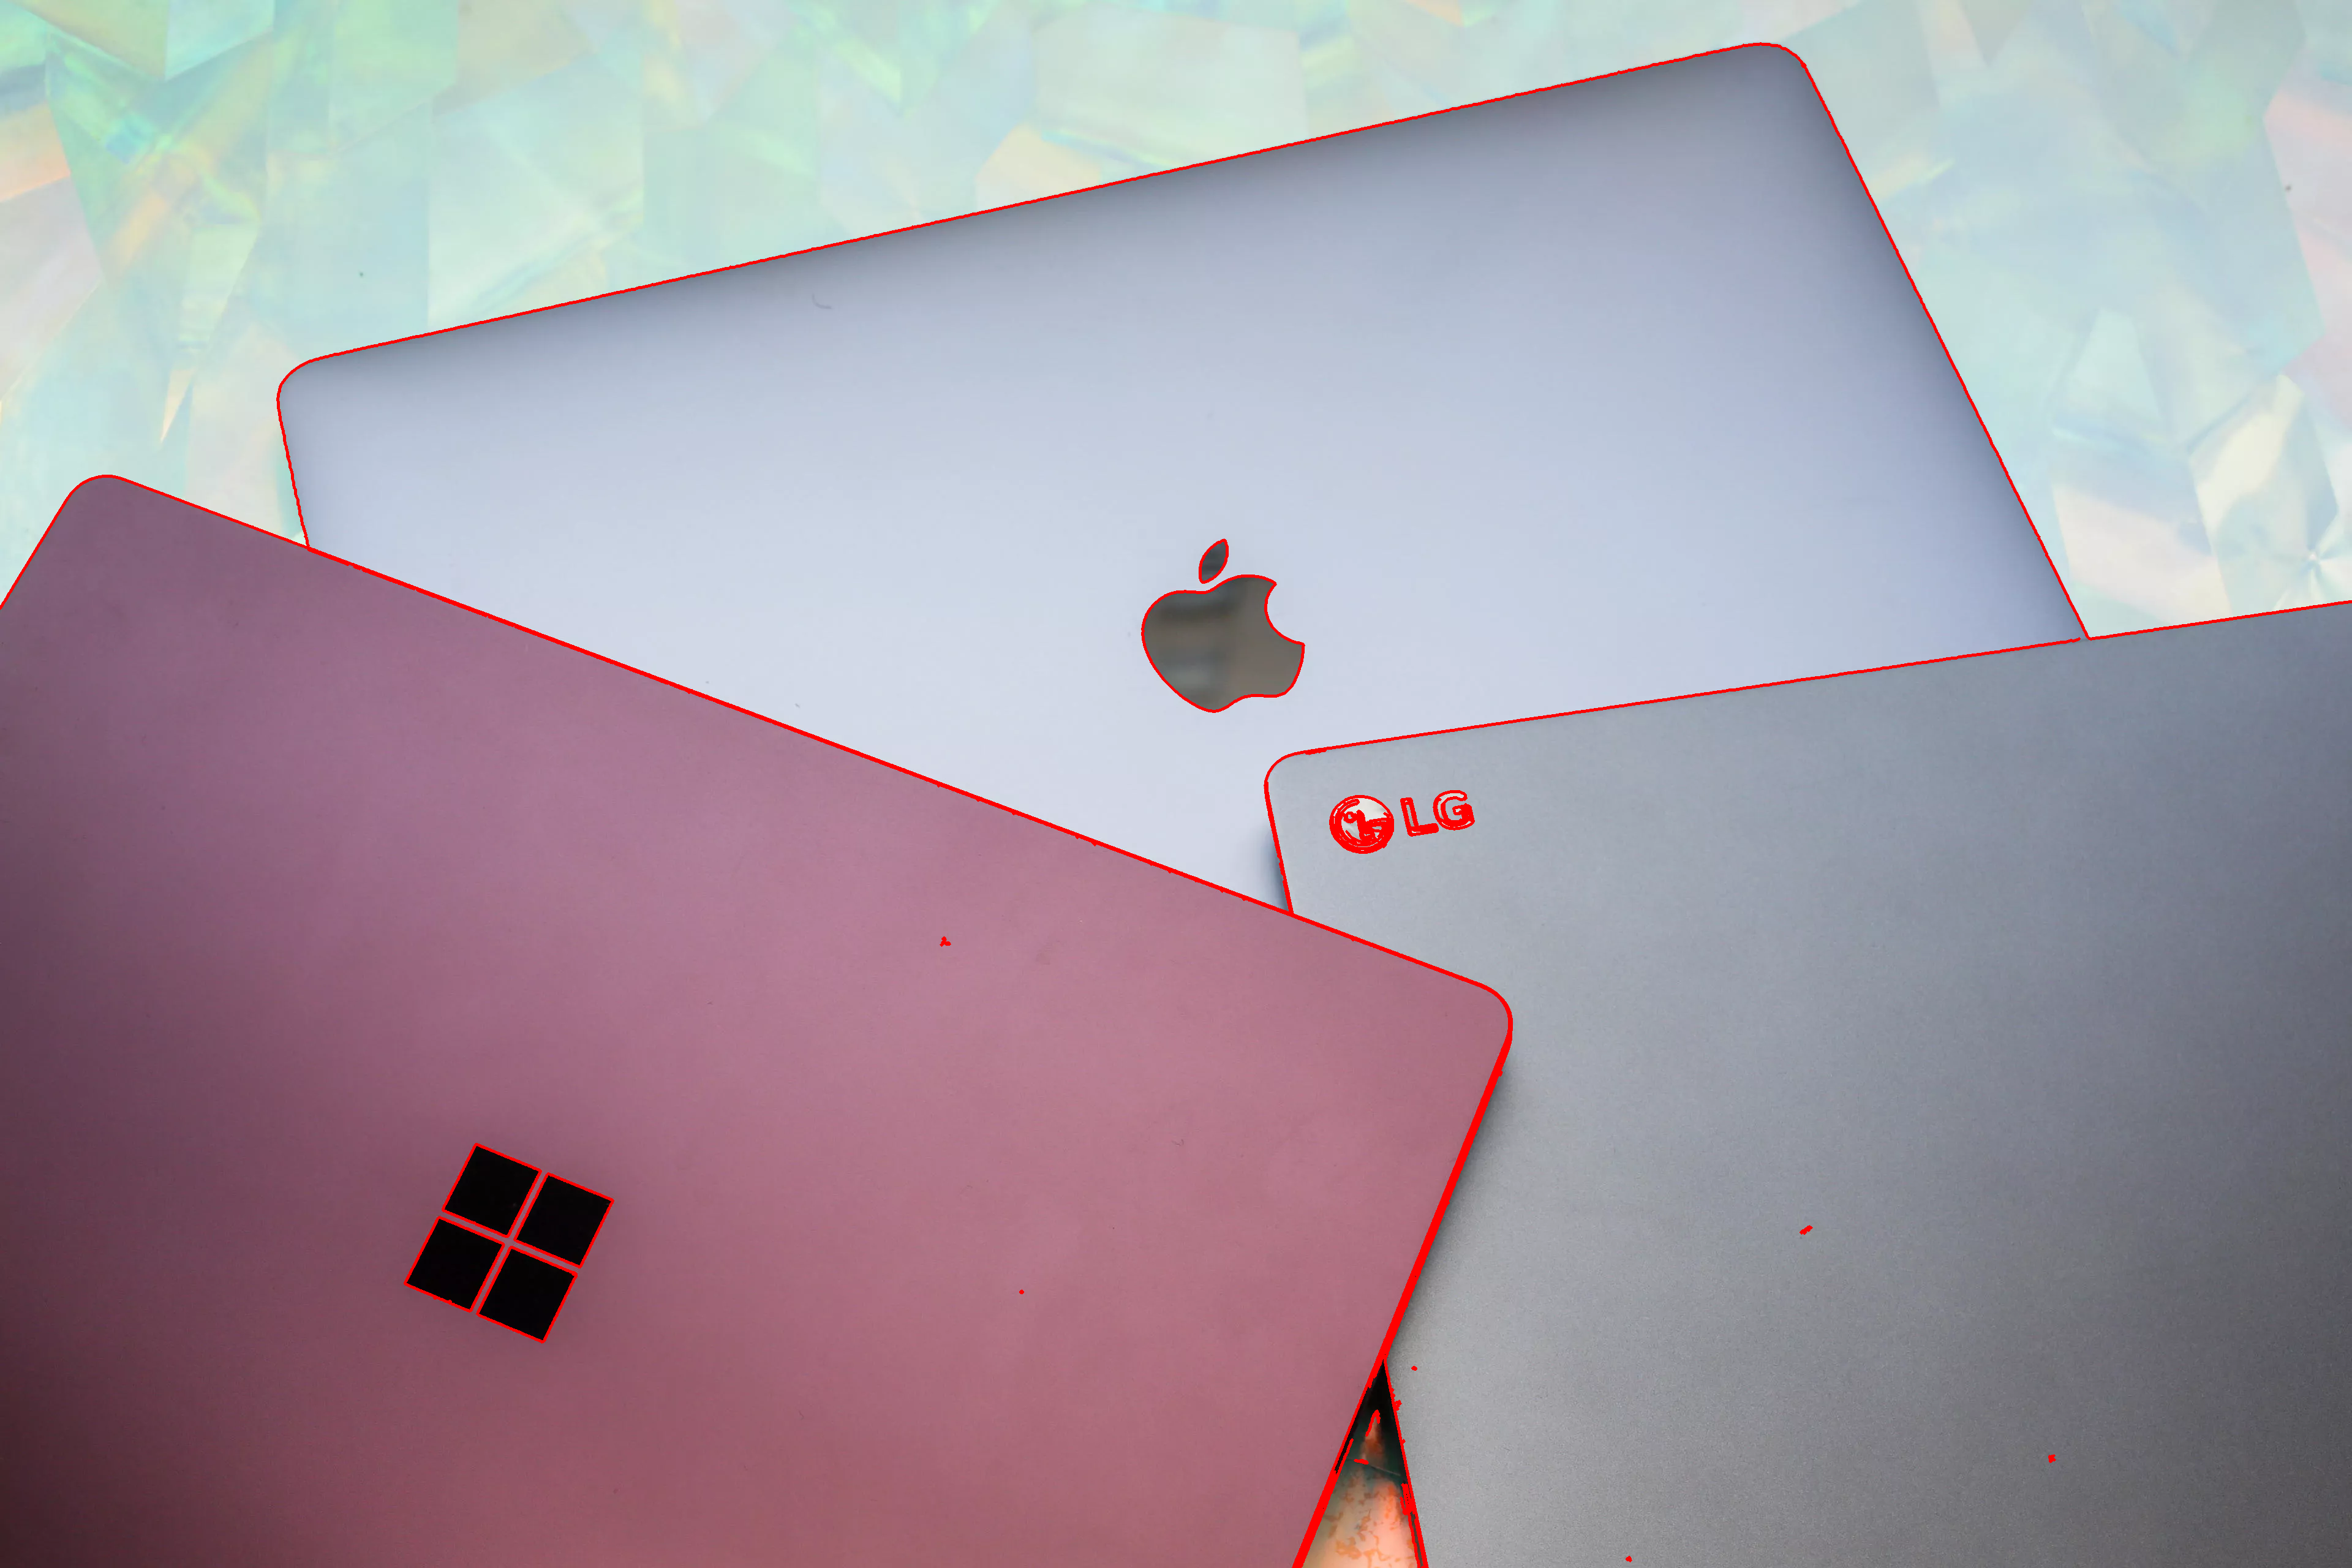

In [103]:
# Import image
img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/laptop.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Convert to canny > find contours > draw contours
thresh = cv.Canny(gray,40,185)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cv.drawContours(img, contours, -1, (0,0,255), 3)

cv2_imshow(img)